# David Aragon - 21053
# Jennifer Toxcon - 21276

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10

In [21]:
# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [22]:
# Normalizar los datos
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [23]:
# Convertir las etiquetas a one-hot encoding
train_labels_one_hot = to_categorical(train_labels, 10)
test_labels_one_hot = to_categorical(test_labels, 10)

In [24]:
# Crear un generador de imágenes para Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

In [25]:
# Definir la arquitectura del modelo
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=train_images.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [26]:
# Crear el modelo
model = createModel()

# Compilar el modelo
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\acer\OneDrive - Universidad del Valle de Guatemala\Documentos\GitHub\Lab3DeepLearning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Entrenar el modelo
batch_size = 64
epochs = 20

history = model.fit(datagen.flow(train_images, train_labels_one_hot, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(test_images, test_labels_one_hot),
                    verbose=1)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 84ms/step - accuracy: 0.2103 - loss: 2.0822 - val_accuracy: 0.3987 - val_loss: 1.7156
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.4313 - loss: 1.5653 - val_accuracy: 0.5583 - val_loss: 1.2250
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.5050 - loss: 1.3832 - val_accuracy: 0.5904 - val_loss: 1.1301
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.5519 - loss: 1.2708 - val_accuracy: 0.5910 - val_loss: 1.2073
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.5763 - loss: 1.1977 - val_accuracy: 0.6427 - val_loss: 1.0276
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.6023 - loss: 1.1438 - val_accuracy: 0.6699 - val_loss: 0.9587
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.6133 - loss: 1.1209 - val_accuracy: 0.6834 - val_loss: 0.9373
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.6292 - loss: 1.0843

In [28]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6755 - loss: 1.0485
Test accuracy: 0.6721000075340271


Text(0.5, 1.0, 'Accuracy Curves')

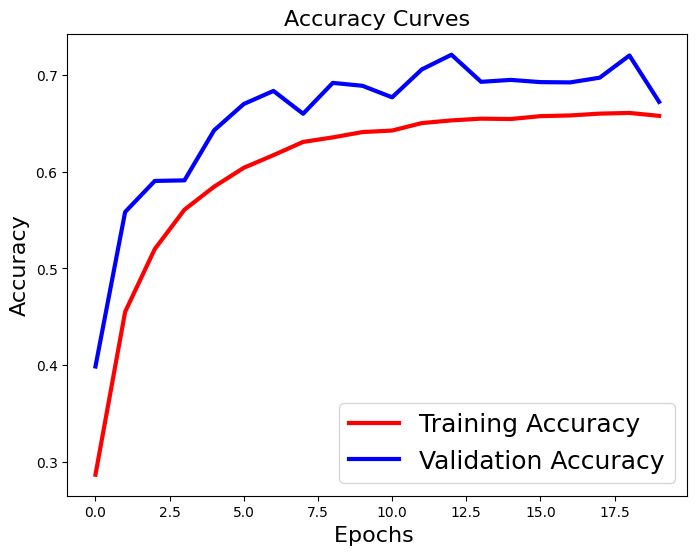

In [29]:
# Graficar los resultados
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

In [30]:
# Generar la matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


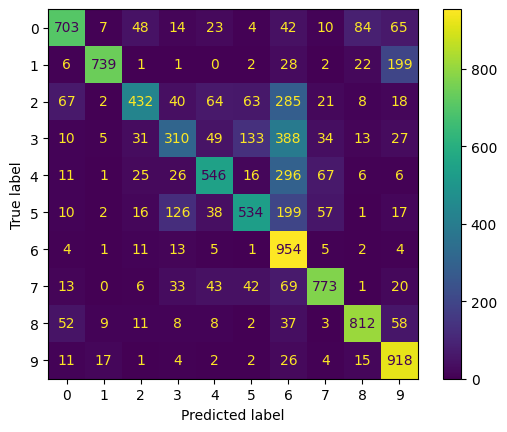

In [32]:
predictions = model.predict(test_images)
cm = confusion_matrix(test_labels_one_hot.argmax(axis=1), predictions.argmax(axis=1))
ConfusionMatrixDisplay(cm).plot()